# Detection of Common Thorax Disease Categories from Chest X-Ray Images

ChestX-ray dataset comprises 112,120 frontal-view X-ray images of 30,805 unique patients with the text-mined fourteen disease image labels (where each image can have multi- labels), mined from the associated radiological reports using natural language processing. Fourteen common thoracic pathologies include Atelectasis, Consolidation, Infiltration, Pneumothorax, Edema, Emphysema, Fibrosis, Effusion, Pneumonia, Pleural_thickening, Cardiomegaly, Nodule, Mass and Hernia.

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/Users/neeharikasinha/Documents/datascience-course/Capstone1/Data_Entry_2017.csv") 
print(df.head(3))

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1                        0.143  0.143          NaN  
2                        0.168  0.168          NaN  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


Renaming to the columns for consistancy

In [6]:
df.rename(columns={'Image Index':'img_index','Finding Labels':'labels','Follow-up #':'follow_up','Patient ID':'pa_id',
                   'Patient Age':'pa_age','Patient Gender':'pa_gender','View Position':'view_position'}, inplace=True)

Checking for null values in each column

In [7]:
df["img_index"].isnull().values.any()

False

In [8]:
df["labels"].isnull().values.any()

False

In [9]:
df["follow_up"].isnull().values.any()

False

In [10]:
df["pa_id"].isnull().values.any()

False

In [11]:
df["pa_age"].isnull().values.any()

False

In [12]:
df["pa_gender"].isnull().values.any()

False

In [13]:
df.groupby('pa_gender').size()

pa_gender
F    48780
M    63340
dtype: int64

df.groupby('pa_age').size()

checking for outliers in age column and considering the age 117 years are to be feasible

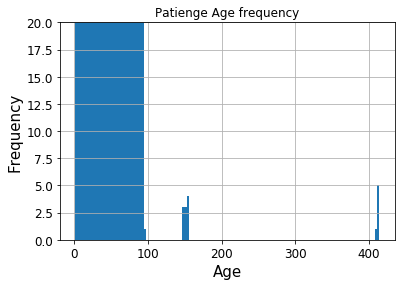

In [14]:
df['pa_age'].hist(bins=150, grid=True, xlabelsize=12, ylabelsize=12)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.ylim(0,20)
plt.title('Patienge Age frequency')
plt.show()

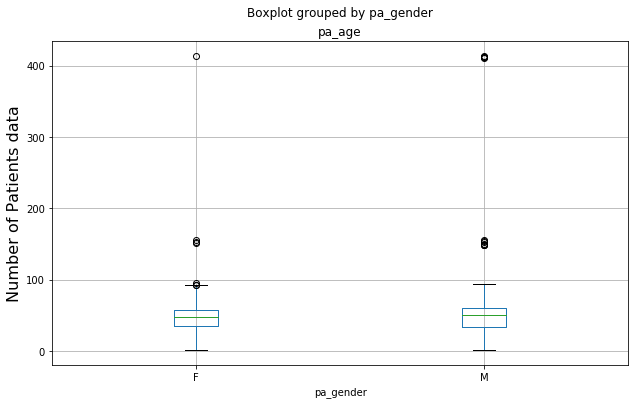

In [39]:
plt.rcParams["figure.figsize"] = [10,6]
#plt.figure(figsize=(10,6)) 
ax= df.boxplot(column='pa_age', by='pa_gender')
ax.set_ylabel('Number of Patients data', fontsize=16)
plt.savefig('Outliers in patients gender.png')
plt.show()

Tiday Data 

In [33]:
Age_below_117 = df['pa_age'] < 117 
df[Age_below_117]
tidy_df=df[Age_below_117]
tidy_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112104 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   img_index                    112104 non-null  object 
 1   labels                       112104 non-null  object 
 2   follow_up                    112104 non-null  int64  
 3   pa_id                        112104 non-null  int64  
 4   pa_age                       112104 non-null  int64  
 5   pa_gender                    112104 non-null  object 
 6   view_position                112104 non-null  object 
 7   OriginalImage[Width          112104 non-null  int64  
 8   Height]                      112104 non-null  int64  
 9   OriginalImagePixelSpacing[x  112104 non-null  float64
 10  y]                           112104 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 11.1+ MB


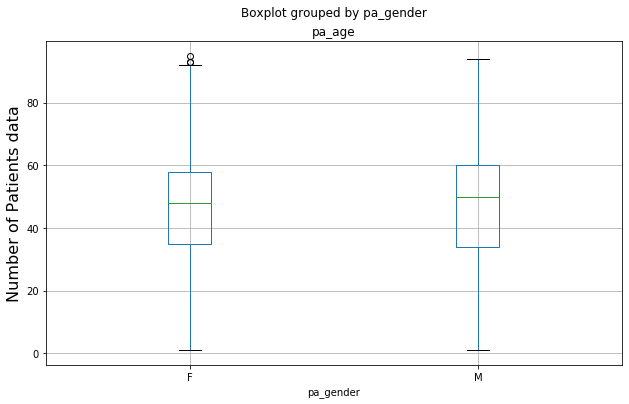

In [38]:
ax2=tidy_df.boxplot(column='pa_age',by='pa_gender')
ax2.set_ylabel('Number of Patients data',fontsize=16)
plt.savefig('After removing odd ages >117 years.png')
plt.show()

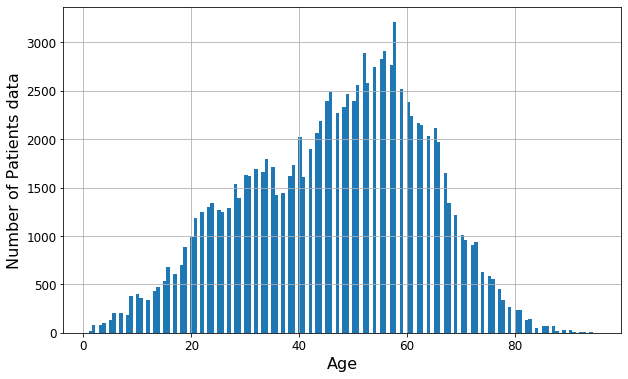

In [37]:
ax3=tidy_df['pa_age'].hist(bins=150, grid=True, xlabelsize=12, ylabelsize=12)
ax3.set_xlabel('Age', fontsize=16)
ax3.set_ylabel('Number of Patients data',fontsize=16)
plt.savefig('Population of data After removing odd ages >117 years.png')
plt.show()